# EVALUACIÓN FINAL MÓDULO 8: PREDICCIÓN DE NATALIDAD SEGÚN FACTORES SOCIOECONÓMICOS

Eres parte de un equipo de investigación en demografía y te han solicitado desarrollar un modelo basado en redes neuronales para predecir la tasa de natalidad en distintos países. Para ello, contarás con un dataset que incluye información socioeconómica como el PIB per cápita, el acceso a servicios de salud, la tasa de educación y otros factores relevantes.

Tu objetivo es diseñar, entrenar y evaluar una red neuronal que permita predecir la tasa de natalidad de manera precisa, analizando el impacto de diferentes variables en la predicción.

# OBJETIVOS DE LA EVALUACIÓN
1. Diseñar y entrenar una red neuronal para resolver un problema de regresión.
2. Aplicar conocimientos sobre funciones de activación, optimizadores, y estrategias para
prevenir sobreajuste.
3. Evaluar y comparar los resultados obtenidos con diferentes configuraciones de la red.
4. Analizar la influencia de cada variable en la predicción y extraer conclusiones sobre patrones socioeconómicos globales.

# INSTRUCCIONES

**1. Carga y exploración de datos (1 punto)**
* Carga el dataset proporcionado, que contiene información de distintos países sobre:
  * PIB per cápita
  * Acceso a servicios de salud (% de la población)
  * Nivel educativo promedio
  * Tasa de empleo femenino
  * Edad promedio de maternidad
  * Índice de urbanizacióno Tasa de natalidad (variable objetivo)
* Analiza las correlaciones entre variables y visualiza su distribución.

**2. Diseño y entrenamiento del modelo (5 puntos)**
* Diseña una red neuronal con la siguiente estructura:
  * Capa de entrada con tantas neuronas como variables predictoras.
  * Mínimo de 2 capas ocultas con activaciones adecuadas.
  * Capa de salida con una neurona para predecir la tasa de natalidad.
* Aplica diferentes funciones de activación y evalúa su impacto.
* Utiliza optimizadores adecuados y experimenta con diferentes valores de learning rate.
* Aplica regularización (dropout o L2) para evitar el sobreajuste.
* Entrena el modelo utilizando una función de pérdida adecuada para problemas de regresión.

**3. Evaluación y optimización del modelo (3 puntos)**
* Evalúa el modelo con datos de prueba.
* Ajusta hiperparámetros para mejorar el rendimiento.
* Analiza el impacto de cada variable en la predicción.
* Realiza predicciones con el modelo y compáralas con datos reales.

**4. Análisis de resultados y reflexión final (1 punto)**
* Explica qué variables resultaron más influyentes en la predicción de la natalidad.
* Relaciona los resultados con tendencias demográficas globales.
* Propón mejoras o ajustes para futuras versiones del modelo.
________________________________________________________________________________

**1. Carga y exploración de datos (1 punto)**
* Carga el dataset proporcionado, que contiene información de distintos países sobre:
  * PIB per cápita
  * Acceso a servicios de salud (% de la población)
  * Nivel educativo promedio
  * Tasa de empleo femenino
  * Edad promedio de maternidad
  * Índice de urbanizacióno Tasa de natalidad (variable objetivo)
* Analiza las correlaciones entre variables y visualiza su distribución.

In [1]:
# importar librerias
!pip -q install -U scikit-learn==1.6.1 xgboost>=2.1.4 lightgbm>=4.5.0 scikeras>=0.13.0
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Configurar la visualización para mostrar 2 decimales
pd.options.display.float_format = '{:.2f}'.format

# Cargar el dataset
df_natalidad = pd.read_csv('/content/dataset_natalidad.csv')

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
display(df_natalidad.head())

# Describir el dataset
print("\nDescripción del dataset:")
display(df_natalidad.describe())

# Información del dataset
print("\nInformación del dataset:")
df_natalidad.info()

Primeras filas del dataset:


,País,PIB_per_capita,Acceso_Salud,Nivel_Educativo,Tasa_Empleo_Femenino,Edad_Maternidad,Urbanizacion,Tasa_Natalidad
0,País_1,25599.71,51.57,14.63,32.58,21.55,71.89,38.61
1,País_2,57289.29,81.82,6.26,56.57,33.54,62.17,19.21
2,País_3,45259.67,65.72,7.42,57.03,27.58,48.57,26.56
3,País_4,37926.22,75.43,18.48,61.87,32.40,78.83,29.18
4,País_5,13581.03,95.38,14.10,66.30,24.80,71.08,40.00



Descripción del dataset:


,PIB_per_capita,Acceso_Salud,Nivel_Educativo,Tasa_Empleo_Femenino,Edad_Maternidad,Urbanizacion,Tasa_Natalidad
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,30859.94,74.89,12.76,54.56,27.74,61.52,32.55
std,16361.92,14.66,4.40,14.67,4.78,17.83,7.38
min,5303.72,50.35,5.08,30.72,20.16,30.87,13.06
25%,15626.04,62.10,9.15,42.48,23.96,45.33,26.90
50%,30527.84,75.28,13.44,55.49,27.88,61.69,34.58
75%,45161.17,88.31,16.29,66.79,31.95,78.67,39.92
max,59278.78,99.28,19.85,79.53,34.89,89.98,40.00



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   País                  100 non-null    object 
 1   PIB_per_capita        100 non-null    float64
 2   Acceso_Salud          100 non-null    float64
 3   Nivel_Educativo       100 non-null    float64
 4   Tasa_Empleo_Femenino  100 non-null    float64
 5   Edad_Maternidad       100 non-null    float64
 6   Urbanizacion          100 non-null    float64
 7   Tasa_Natalidad        100 non-null    float64
dtypes: float64(7), object(1)
memory usage: 6.4+ KB



Matriz de correlación:


,PIB_per_capita,Acceso_Salud,Nivel_Educativo,Tasa_Empleo_Femenino,Edad_Maternidad,Urbanizacion,Tasa_Natalidad
PIB_per_capita,1.00,-0.03,-0.04,-0.21,0.12,0.07,-0.87
Acceso_Salud,-0.03,1.00,-0.15,-0.01,-0.08,-0.23,0.08
Nivel_Educativo,-0.04,-0.15,1.00,-0.21,-0.03,-0.02,-0.12
Tasa_Empleo_Femenino,-0.21,-0.01,-0.21,1.00,0.19,-0.22,0.24
Edad_Maternidad,0.12,-0.08,-0.03,0.19,1.00,-0.13,-0.30
Urbanizacion,0.07,-0.23,-0.02,-0.22,-0.13,1.00,0.20
Tasa_Natalidad,-0.87,0.08,-0.12,0.24,-0.30,0.20,1.00


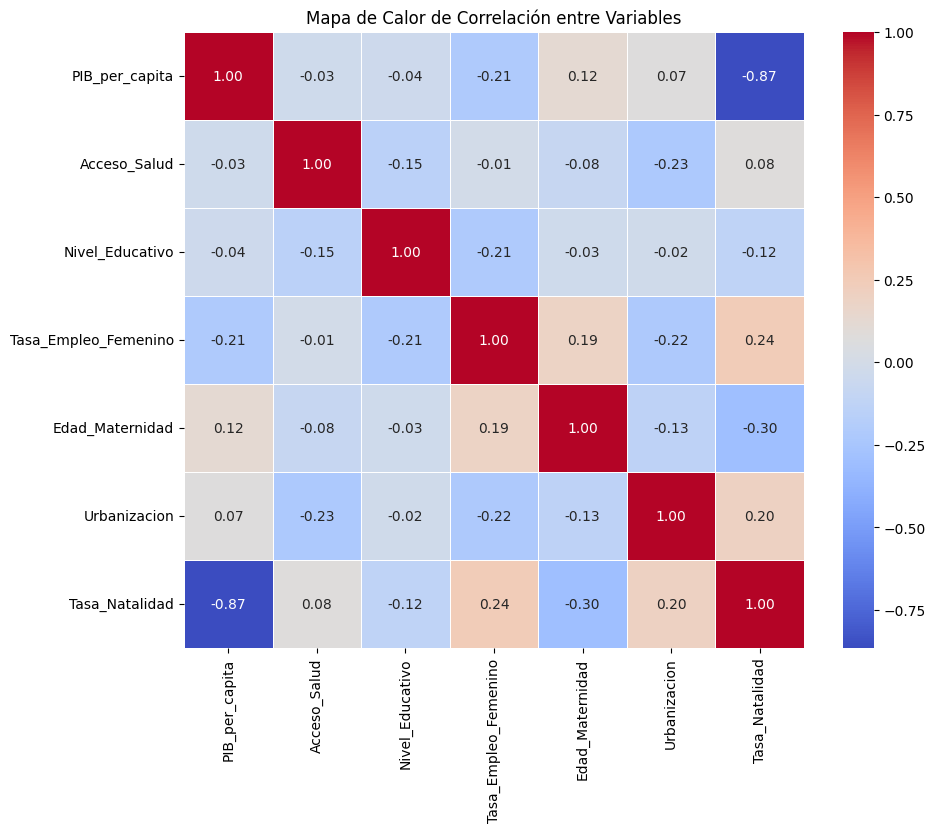

In [3]:
# Configurar la visualización para mostrar 2 decimales
pd.options.display.float_format = '{:.2f}'.format

# Analizar las correlaciones entre variables (excluyendo la columna 'País')
print("\nMatriz de correlación:")
correlation_matrix = df_natalidad.drop('País', axis=1).corr()
display(correlation_matrix)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()

**2. Diseño y entrenamiento del modelo (5 puntos)**
* Diseña una red neuronal con la siguiente estructura:
  * Capa de entrada con tantas neuronas como variables predictoras.
  * Mínimo de 2 capas ocultas con activaciones adecuadas.
  * Capa de salida con una neurona para predecir la tasa de natalidad.

In [4]:
# Preparar los datos
X = df_natalidad.drop(['País', 'Tasa_Natalidad'], axis=1)
y = df_natalidad['Tasa_Natalidad']

# Separar datos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Diseñar el modelo
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Capa de entrada
    Dense(64, activation='relu'),  # 1ra capa oculta
    Dense(32, activation='relu'),  # 2da capa oculta
    Dense(1)  # Capa de salida
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluar el modelo
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Model Evaluation:")
print(f"  Mean Squared Error (MSE): {loss:.2f}")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")

# Mostrar resumen del modelo
print("\nModel Summary:")
model.summary()

Model Evaluation:
  Mean Squared Error (MSE): 27.66
  Mean Absolute Error (MAE): 4.43

Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,685 (30.02 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,124 (20.02 KB)

* Aplica diferentes funciones de activación y evalúa su impacto.
* Utiliza optimizadores adecuados y experimenta con diferentes valores de learning rate.
* Aplica regularización (dropout o L2) para evitar el sobreajuste.
* Entrena el modelo utilizando una función de pérdida adecuada para problemas de regresión.

In [7]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Preparar los datos (usamos los datos escalados del paso anterior)
# Aunque XGBoost no requiere escalado, podemos usar los datos ya preparados
X = df_natalidad.drop(['País', 'Tasa_Natalidad'], axis=1)
y = df_natalidad['Tasa_Natalidad']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características (opcional para XGBoost, pero mantenemos la consistencia)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Definir el modelo XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Definir la cuadrícula de parámetros para GridSearchCV
# Ajustamos los rangos y valores para obtener aproximadamente 32 combinaciones
param_grid = {
    'n_estimators': [100, 200],  # Número de árboles
    'learning_rate': [0.01, 0.1, 0.2], # Tasa de aprendizaje
    'max_depth': [3, 5, 7], # Profundidad máxima del árbol
    'subsample': [0.8, 1.0], # Fracción de muestras para entrenar cada árbol
    'colsample_bytree': [0.8, 1.0] # Fracción de características para entrenar cada árbol
}

# Calcular el número de combinaciones
num_combinations = np.prod([len(v) for v in param_grid.values()])
print(f"Número de combinaciones a probar: {num_combinations}")

# Crear el objeto GridSearchCV
# Utilizamos neg_mean_squared_error como métrica de puntuación (GridSearchCV maximiza, por eso es negativo)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, verbose=1)

# Realizar la búsqueda en cuadrícula
print("\nRealizando Búsqueda en Cuadrícula con XGBoost...")
grid_result = grid_search.fit(X_train_scaled, y_train)

# Resumir los resultados
print("\nMejores parámetros encontrados: %s" % grid_result.best_params_)
print("Mejor MSE negativo encontrado: %f" % grid_result.best_score_)

# Evaluar el mejor modelo en el conjunto de prueba
best_xgb_model = grid_result.best_estimator_
y_pred = best_xgb_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nEvaluación del mejor modelo XGBoost en el conjunto de prueba:")
print(f"  Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"  Error Absoluto Medio (MAE): {mae:.2f}")
print(f"  Coeficiente de Determinación (R^2): {r2:.2f}")

# Imprimir los mejores parámetros
print("\nMejores parámetros de la cuadrícula:")
print(grid_result.best_params_)

Número de combinaciones a probar: 72

Realizando Búsqueda en Cuadrícula con XGBoost...
Fitting 3 folds for each of 72 candidates, totalling 216 fits

Mejores parámetros encontrados: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Mejor MSE negativo encontrado: -8.150577

Evaluación del mejor modelo XGBoost en el conjunto de prueba:
  Error Cuadrático Medio (MSE): 3.86
  Error Absoluto Medio (MAE): 1.58
  Coeficiente de Determinación (R^2): 0.95

Mejores parámetros de la cuadrícula:
{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


**3. Evaluación y optimización del modelo (3 puntos)**
* Evalúa el modelo con datos de prueba.
* Ajusta hiperparámetros para mejorar el rendimiento.
* Analiza el impacto de cada variable en la predicción.
* Realiza predicciones con el modelo y compáralas con datos reales.


Importancia de las variables (Feature Importances):


,Variable,Importancia
0,PIB_per_capita,0.64
5,Urbanizacion,0.22
4,Edad_Maternidad,0.06
2,Nivel_Educativo,0.05
1,Acceso_Salud,0.02
3,Tasa_Empleo_Femenino,0.01


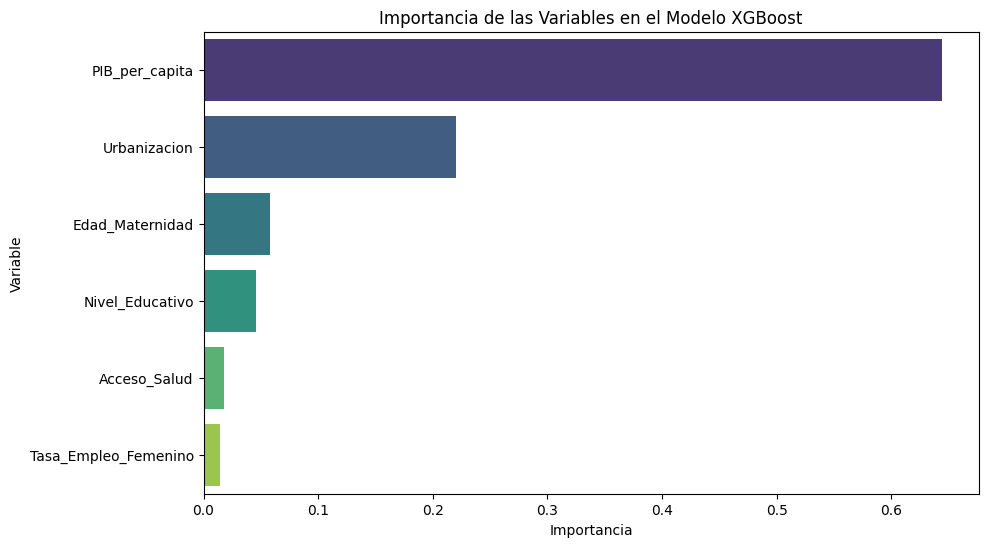

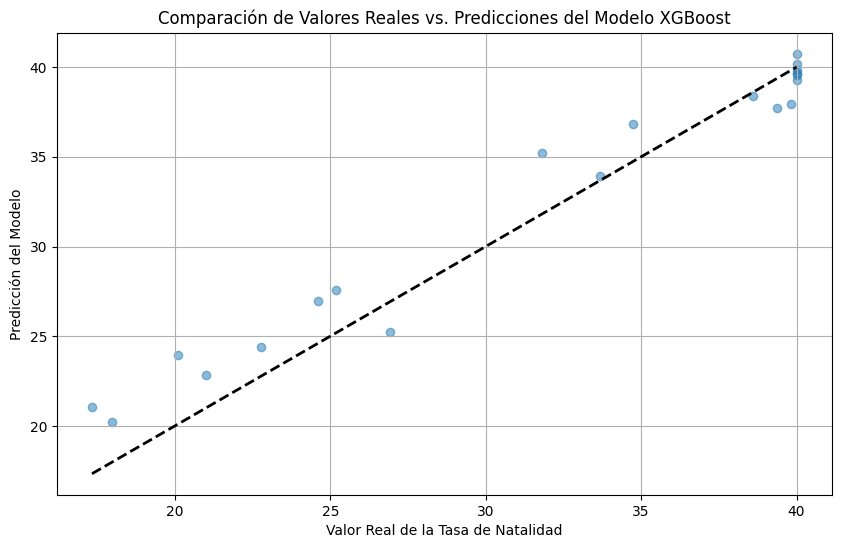


Comparación de valores reales y predicciones (primeros 10 de prueba):


,Valor Real,Predicción
83,40.00,39.57
53,17.99,20.19
70,25.18,27.57
45,20.11,23.93
44,39.38,37.74
39,31.81,35.20
22,40.00,40.75
80,17.34,21.07
10,40.00,39.86
0,38.61,38.40


In [9]:
# Analizar la importancia de las variables del mejor modelo XGBoost
print("\nImportancia de las variables (Feature Importances):")
feature_importances = best_xgb_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Variable': features, 'Importancia': feature_importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)
display(importance_df)

# Visualizar la importancia de las variables
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=importance_df, palette='viridis', hue='Variable', legend=False)
plt.title('Importancia de las Variables en el Modelo XGBoost')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

# Realizar predicciones con el mejor modelo en el conjunto de prueba
y_pred = best_xgb_model.predict(X_test_scaled)

# Comparar predicciones con datos reales (visualización)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Línea de referencia ideal
plt.xlabel('Valor Real de la Tasa de Natalidad')
plt.ylabel('Predicción del Modelo')
plt.title('Comparación de Valores Reales vs. Predicciones del Modelo XGBoost')
plt.grid(True)
plt.show()

# Comparar predicciones con datos reales (numérico - mostrar algunas comparaciones)
print("\nComparación de valores reales y predicciones (primeros 10 de prueba):")
comparison_df = pd.DataFrame({'Valor Real': y_test, 'Predicción': y_pred})
display(comparison_df.head(10))

**4. Análisis de resultados y reflexión final (1 punto)**
* Explica qué variables resultaron más influyentes en la predicción de la natalidad.
* Relaciona los resultados con tendencias demográficas globales.
* Propón mejoras o ajustes para futuras versiones del modelo.

  Según los resultados obtenidos, la variable más relacionada con la tasa de natalidad, con más del 60%. Esto se condice con los datos, ya que a mayor PIB per cápita, la tasa de natalidad disminuye.

  Por otro lado, la urbanización aumenta ligeramente la tasa de natalidad. En el mundo real, en general la gente en áreas rurales tiene más hijos que la gente en las ciudades. Quizás los datos no están actualizados y no permiten ver ese patrón.

  El resto de variables influye muy poco en la tasa de natalidad
  